#### IMPORTING LIBRARIES

In [184]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split as tts
%matplotlib inline
import matplotlib.pyplot as plt

#### LOADING AND PREPARING DATA

In [185]:
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv

--2020-12-31 04:43:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  19.51K  --.-KB/s    in 0.001s  

2020-12-31 04:43:19 (21.7 MB/s) - ‘cell_samples.csv’ saved [19975/19975]



In [186]:
df_cell= pd.read_csv('cell_samples.csv')

In [187]:
df_cell.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [188]:
df_cell.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [189]:
df_cell['Class'].unique()

array([2, 4])

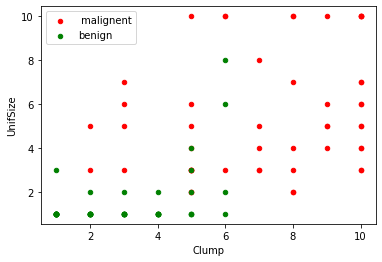

In [190]:
ax = df_cell[df_cell['Class']==4][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'Red',label = ' malignent'); 
df_cell[df_cell['Class']==2][0:50].plot(kind = 'scatter', x = 'Clump', y = 'UnifSize', color = 'Green', label = 'benign',ax = ax); 
plt.show()

In [191]:
df_cell.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [192]:
df_cell= df_cell[pd.to_numeric(df_cell['BareNuc'], errors = 'coerce').notnull()]

In [193]:
df_cell['BareNuc'] = df_cell['BareNuc'].astype('int')

In [194]:
df_cell.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [195]:
feature_df = df_cell[['Clump', 'UnifSize', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
type(feature_df)

pandas.core.frame.DataFrame

In [196]:
X = np.asarray(feature_df)

In [197]:
X[0:5]

array([[ 5,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  3,  2,  1,  3,  1,  1]])

In [198]:
df_cell['Class'] = df_cell['Class'].astype('int')

In [199]:
y = np.array(df_cell['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

#### SPLITING DATA INTO TRAIN AND TEST

In [200]:
X_train,X_test, y_train,y_test = tts(X,y,test_size = 0.2, random_state = 4)

In [201]:
print('Trainset: ', X_train.shape, y_train.shape)
print('Testset:', X_test.shape, y_test.shape)

Trainset:  (546, 8) (546,)
Testset: (137, 8) (137,)


#### MODELING SVM

In [202]:
from sklearn import svm

In [203]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [204]:
yhat = clf.predict(X_test)

In [205]:
yhat[0:5]

array([2, 4, 2, 4, 2])

#### EVALUATION

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#### FUNCTION FOR CONFUSION MATRIX

In [207]:
def plot_confusion_matrix(cm,classes,normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print('Normailzed Confused Matrix')
    else:
        print('Confusion matrix, without Normalization')
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,
               rotation = 45)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### COMPUTING AND PLOTTING CONFUSION MATRIX

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

   micro avg       0.97      0.97      0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion matrix, without Normalization
[[86  4]
 [ 0 47]]


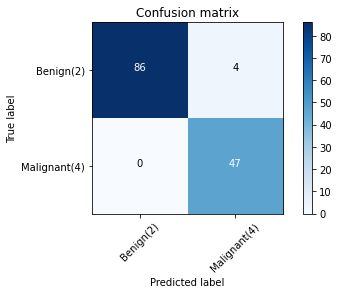

In [208]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

#### F1 SCORE

In [209]:
from sklearn.metrics import f1_score 

In [210]:
f1_score(y_test, yhat, average = 'weighted')

0.9710669934861801

#### JACCARD INDEX

In [211]:
from sklearn.metrics import jaccard_similarity_score

In [212]:
jaccard_similarity_score(y_test,yhat)

0.9708029197080292

#### IBM DATA SCIENCE LAB EXERCISE FOR SUPPORT VECTOR MACHINE